# 데이터 다운로드 및 업로드
## healthcare-dataset-stroke-data.csv 파일을 다운로드 받기
### https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

1. 데이터 로딩
2. EDA
-  피처간 상관관계 보기
-  카운트 플랏
3. 데이터 전처리
- 불필요한 Feature 제거
- 결측치 처리
- 문자열 데이터 숫자로 인코딩
4. 머신러닝 모델 만들기
- 학습/테스트 데이터 준비하기
- 학습모델 학습하기
5. 성능평가
- 모델 테스트하기
- 성능 평가하기

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 데이터 로딩

In [45]:
df = pd.read_csv('ml_datas/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 데이터 분석

In [14]:
df.shape

(5110, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 불필요한 Feature 제거

In [17]:
# id column drop
df = df.drop(["id"], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA(탐색적 데이터 분석)
- 데이터 통계량 확인하기
- 데이터의 특징 파악하기
- feature들 간의 상관관계
- feature와 target과의 관계에서 어떤 특징들이 있는지 탐색하기

In [18]:
# 수치형 데이터 통계량 확인하기
df.describe(include=np.number)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 데이터 통계 확인

In [19]:
# 범주형 데이터 컬럼 리스트 추출
cat_cols = list(df.select_dtypes(exclude=np.number).columns)
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [20]:
# 수치형 데이터 컬럼 리스트 추출
num_cols = list(df.select_dtypes(include=np.number).columns)
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [21]:
# 문자형 데이터 통계 확인
df[cat_cols].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [22]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [23]:
# 수치형 데이터 기초 통계 확인
df[num_cols].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [24]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## 데이터 시각화로 탐색하기

<Axes: xlabel='gender', ylabel='count'>

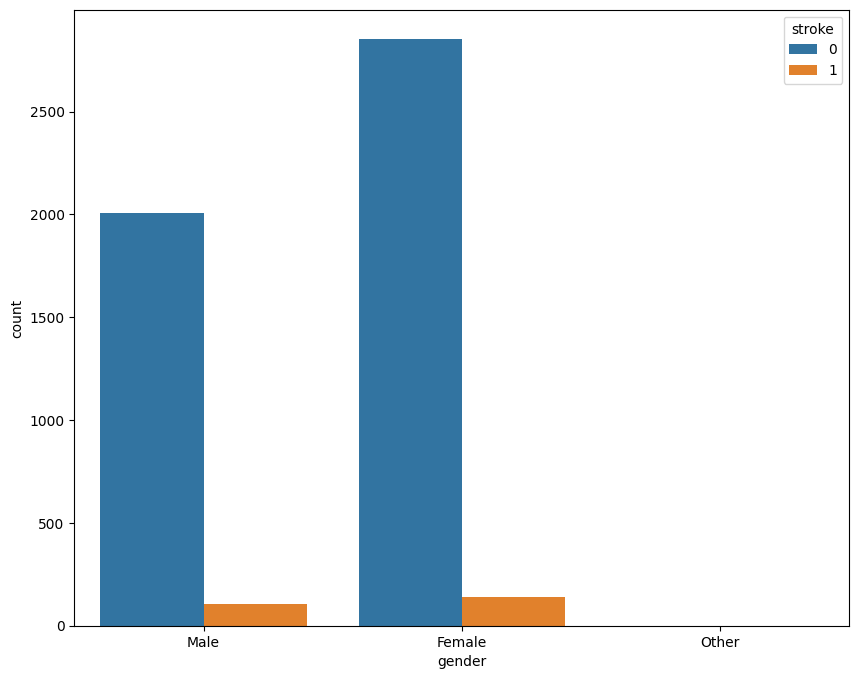

In [25]:
# 성별에 따른 stroke의 0. 1 환자수 카운트 시각화 
plt.figure(figsize=(10,8))
sns.countplot(x="gender", data=df, hue="stroke")

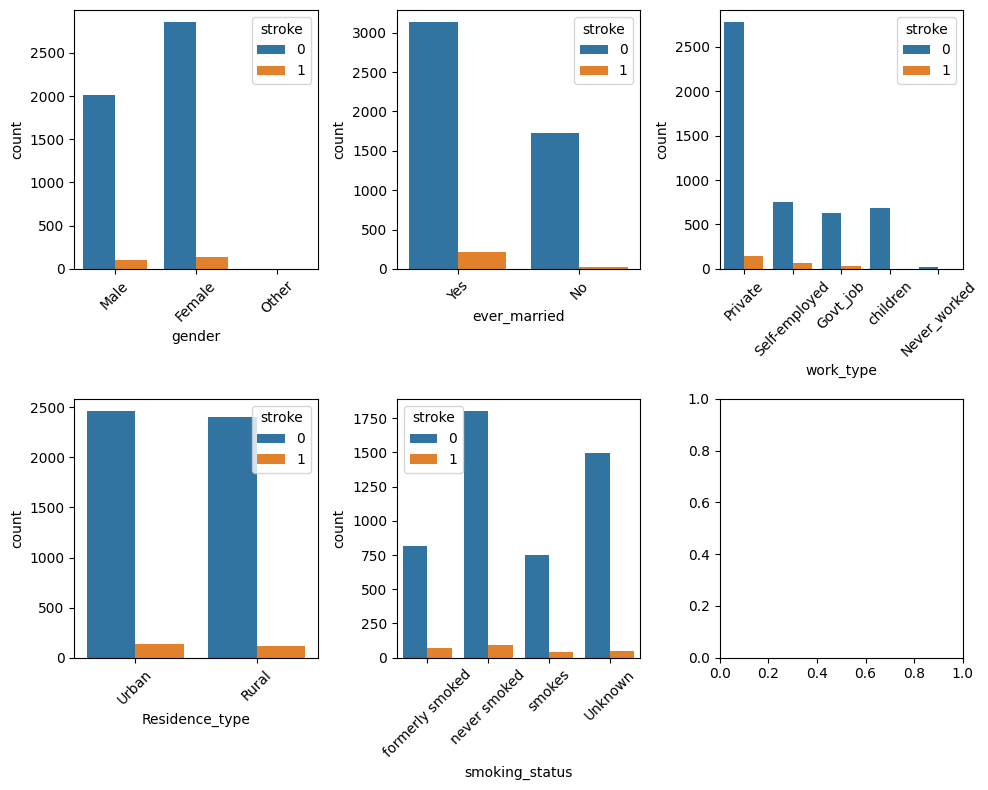

In [26]:
# 문자형 데이터 개별 값과 stroke와의 관계 확인하기
nrows, ncols = 2, 3;
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10, 8)
ax_list = ax_list_list.reshape(2 * 3)

# 그래프 그리기
for i in range(len(cat_cols)):
    # print(df[i])
    # print(i)
    # print("i/nrows" , i/nrows)
    # print("i%ncols", i%ncols)
    fig = sns.countplot(x=cat_cols[i], data=df, hue="stroke", ax=ax_list[i])
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

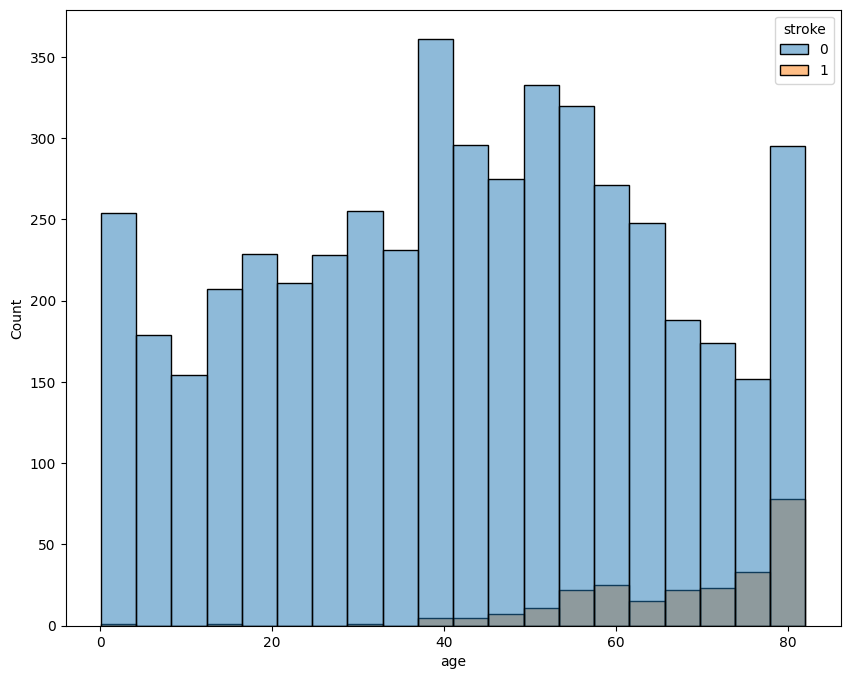

In [27]:
# 나이와 stroke과의 관계 확인하기(histplot())
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="age", hue="stroke")

In [28]:
df['bmi'].count()

4909

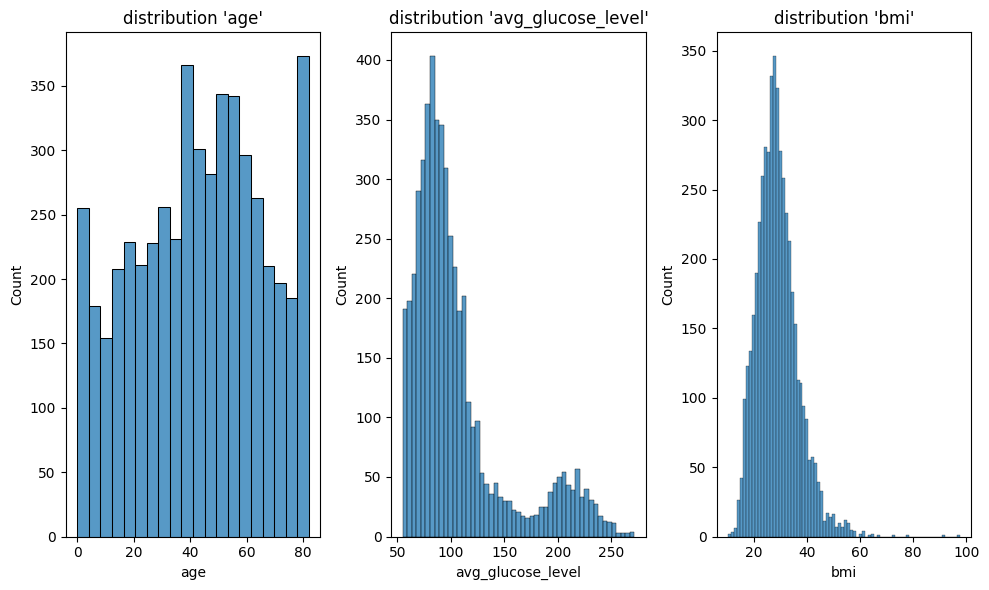

In [29]:
# sns.histplot()으로, 수치형 데이터의 분포 알아보기
num_cols_g = ["age", "avg_glucose_level", "bmi"]
nrows, ncols = 1, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10, 6)
ax_list = ax_list_list.reshape(1 * 3)


# 그래프 그리기
for i in range(len(num_cols_g)):
    # print(i)
    # print(df[num_cols_g])
    ax = sns.histplot(data=df, x=num_cols_g[i], ax=ax_list[i])
    ax.set_title("distribution '" + num_cols_g[i] + "'")

plt.tight_layout()
plt.show()

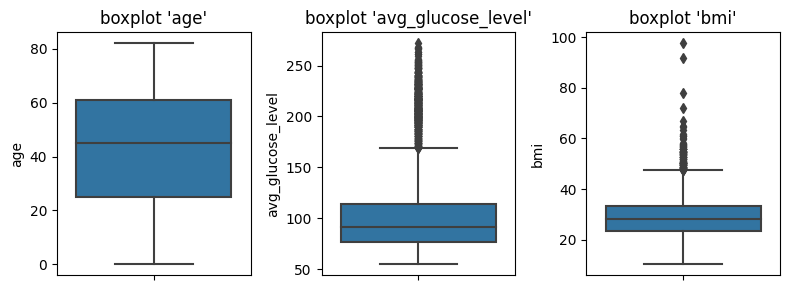

In [30]:
# 통계량은 boxplot으로 살펴보고, sns.boxplots() 활용
nrows, ncols = 1, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,3)
ax_list = ax_list_list.reshape(1 * 3)

# 그래프 그리기
for i in range(len(num_cols_g)):
    # print(i)
    # print(df[num_cols_g])
    ax = sns.boxplot(data=df, y=num_cols_g[i], ax=ax_list[i])
    ax.set_title("boxplot '" + num_cols_g[i] + "'")
    
plt.tight_layout()
plt.show()

In [31]:
# 수치형 데이터 피처들간 상관계수 계산
nums_df = df[num_cols]
nums_df
corr = nums_df.corr()

Text(0.5, 1.0, 'Feature Correlation')

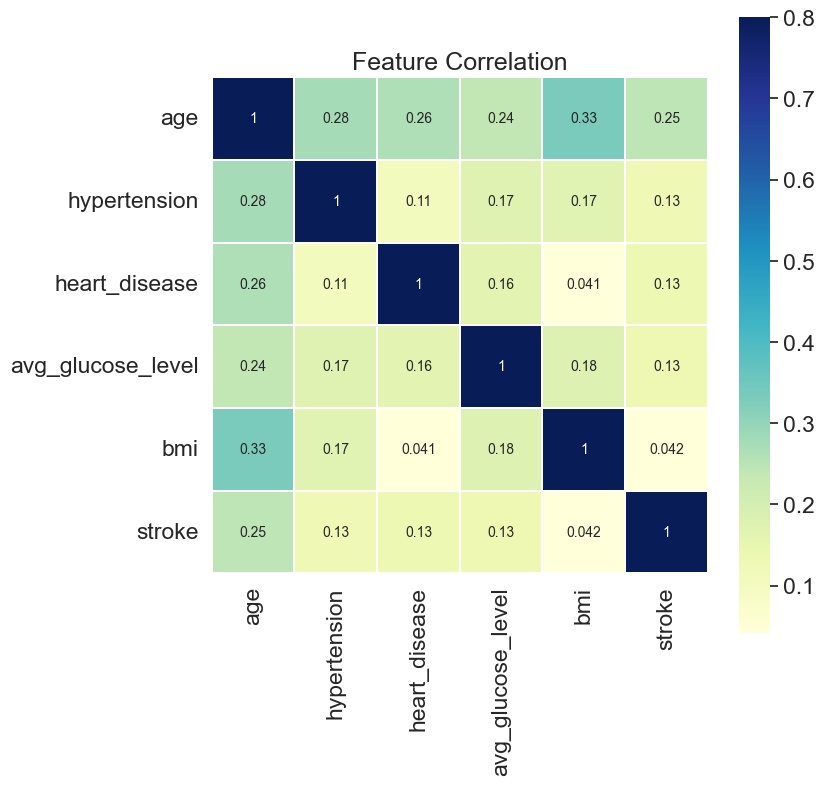

In [32]:
# 피처들간의 상관관계 살펴보기
# vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu'
plt.figure(figsize=(8, 8))

sns.set(font_scale=1.5)
sns.heatmap(
            corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            # fmt = ".2f",
            annot_kws={"size" : 10},
            cmap="YlGnBu"
           );

plt.title('Feature Correlation')

## 결측치 처리하기

In [59]:
# 결측데이터 확인하기
df.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [60]:
# bmi 컬럼 결측 데이터 평균값으로 채워넣기
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [61]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

## 문자형 데이터 숫자로 encoding하기

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [37]:
df[cat_cols].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [38]:
# LabelEncoder 적용
# 컬럼 : work_type, gender, ever_married, Residence_type, smoking_status
from sklearn.preprocessing import LabelEncoder

In [46]:
pd.get_dummies(df, columns = ['work_type', 'gender', 'ever_married', 'Residence_type', "smoking_status"])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,NaN,1,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False


In [40]:
le = LabelEncoder()

df['work_type'] = le.fit_transform(df["work_type"])
df['gender'] = le.fit_transform(df["gender"])
df['ever_married'] = le.fit_transform(df["ever_married"])
df['Residence_type'] = le.fit_transform(df["Residence_type"])
df['smoking_status'] = le.fit_transform(df["smoking_status"])

In [41]:
df_test = pd.DataFrame(df)

df_test["test"] = le.fit_transform(df["gender"])
df_test

pd.get_dummies(df_test, columns = ["gender"])

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,test,gender_0,gender_1,gender_2
0,67.0,0,1,1,2,1,228.69,36.600000,1,1,1,False,True,False
1,61.0,0,0,1,3,0,202.21,28.893237,2,1,0,True,False,False
2,80.0,0,1,1,2,0,105.92,32.500000,2,1,1,False,True,False
3,49.0,0,0,1,2,1,171.23,34.400000,3,1,0,True,False,False
4,79.0,1,0,1,3,0,174.12,24.000000,2,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,2,1,83.75,28.893237,2,0,0,True,False,False
5106,81.0,0,0,1,3,1,125.20,40.000000,2,0,0,True,False,False
5107,35.0,0,0,1,3,0,82.99,30.600000,2,0,0,True,False,False
5108,51.0,0,0,1,2,0,166.29,25.600000,1,0,1,False,True,False


In [48]:
df = pd.get_dummies(df, columns = ['work_type', 'gender', 'ever_married', 'Residence_type', "smoking_status"])

In [47]:
df = df.drop(["id"], axis=1)

In [49]:
df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False
1,61.0,0,0,202.21,NaN,1,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False


## feature(독립변수 X), target(종속변수 y) 분할
### 독립변수, 설명변수, feature
X = df.drop(['stroke'], axis=1)
### 종속변수, target
y = df['stroke']ke']

## 트레이닝/테스트 데이터 준비
- from sklearn.model_selection import train_test_split
    - train_test_split(X, y, test_size=0.2, stratify=y, random_state=2023)
- X : X_데이터
- y : y_데이터
- test_size : 분할 비율 (train 8 : test 2)
- random_state : 분할 재현
- stratify : 주어진 데이터에서 y 값의 비율을 균일하게 분할

In [63]:
# 독립변수, 설명변수, feature
X = df.drop(["stroke"], axis=1)
# 종속변수, target
y = df["stroke"]

In [64]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False


In [65]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2023)

In [54]:
train_y = train_y.astype(int)

## 모델 학습, 테스트, 정확도 확인
- Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [57]:
print(test_y.astype(int))

3547    0
873     0
391     0
608     0
3783    0
       ..
5       1
2263    0
1347    0
3549    0
3336    0
Name: stroke, Length: 1533, dtype: int32


## 학습 모델 테스트
- 테스트 결과는 (y^ : 예측값)

In [68]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_X, train_y)
y_pred = dt_clf.predict(test_X)

# 정확도 측정
# accuracy_score(y테스트 데이터 관측 정답값, y모델 테스트 데이터 예측값)
accuracy = accuracy_score(test_y, y_pred)
print('accuracy :', accuracy)

accuracy : 0.913894324853229


In [69]:
from sklearn.metrics import classification_report

In [70]:
# classification_report() 결과 출력
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1457
           1       0.16      0.17      0.16        76

    accuracy                           0.91      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.92      0.91      0.92      1533



## RandomForestClassifier()

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_clf = RandomForestClassifier()
rf_clf.fit(train_X, train_y)


y_pred = rf_clf.predict(test_X)
score = accuracy_score(test_y, y_pred)
# baseline - 랜덤 포레스트(Random Forest) Accuracy : 0.8533352086922887
print('랜덤 포레스트(Random Forest) Accuracy :', score)

랜덤 포레스트(Random Forest) Accuracy : 0.9497716894977168


In [73]:
# classification_report() 결과 출력
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



## XGBClassifier
- https://xgboost.readthedocs.io/en/stable/
- 한글 정리문서 : https://wooono.tistory.com/97
- XGBClassifer()

In [74]:
from xgboost import XGBClassifier
# xgb_clf = XGBClassifier()

In [75]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# xgboot 

In [76]:
pred_y = xgb_clf.predict(test_X)
score = accuracy_score(test_y, pred_y)

In [77]:
print('XGBClassifier Accuracy: ', score)

XGBClassifier Accuracy:  0.9452054794520548


In [78]:
# 평가 레포트
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



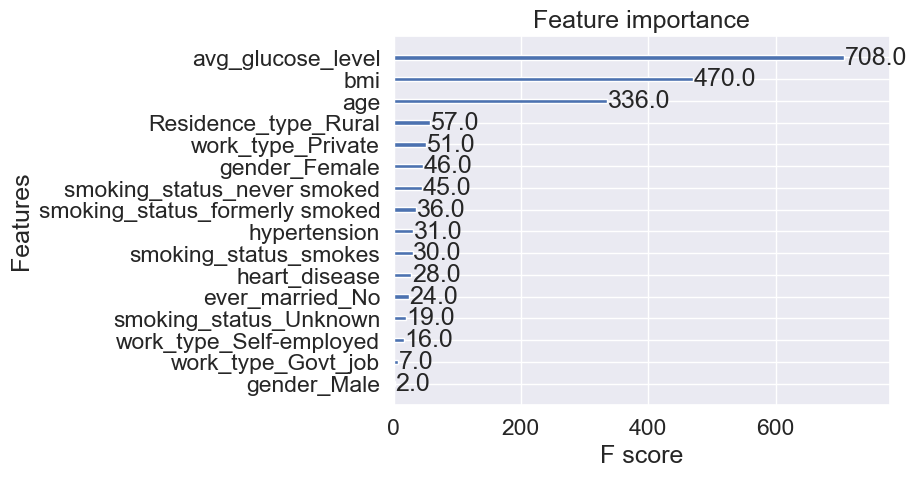

In [79]:
#xgboost의 강력한 기능 Feature Importance 확인
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_clf)
pyplot.show()

## Light GBM
- 공식 문서 : https://lightgbm.readthedocs.io/en/v3.3.2/
- pip install lightgmb

### light GBM

In [80]:
import lightgbm as lgb

In [81]:
lit_gbm = lgb.LGBMClassifier()

In [82]:
lit_gbm.fit(train_X, train_y)

pred_y_lgb = lit_gbm.predict(test_X)
accuracy = accuracy_score(test_y, pred_y_lgb)

In [83]:
print('lightgbm accuracy :', accuracy)

lightgbm accuracy : 0.9497716894977168


In [84]:
# 평가 레포트
print(classification_report(test_y, pred_y_lgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.46      0.08      0.13        76

    accuracy                           0.95      1533
   macro avg       0.71      0.54      0.55      1533
weighted avg       0.93      0.95      0.93      1533



## GridsearchCV 사용
- Best Hyper Parameter 찾기

In [85]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

## K-fold 교차 검증
- 1에 가까울수록 좋다

In [86]:
from sklearn.model_selection import GridSearchCV

## GridSearchCV 객체 생성
- GridSearchCV(학습기 식별자, paramgrid=하이퍼 파라미터 맵, scoring=평가 방법, n_jobs=갯수(-1: 모두))
- GridSearchCV(xgb_clf, paramgrid=cv_params, scoring="f1_micro", n_jobs=-1)

## 학습기의 하이퍼 파라미터 맵 구성

In [87]:
cv_params = {
    "n_estimators" : [100, 200, 300, 400, 500],
    "learning_rate" : [0.01, 0.05, 0.1, 0.15],
    "max_depth" : [3, 5, 7, 10, 15],
    "games" : [0, 1, 2, 3],
    "colsaple_bytree" : [0.8, 0.9]
}

- score 종류는 acc, f1, f1_micro, f1_macro 등 원하는 걸로 설정
- 여기서 설정 마라미터의 갯수(총 800개의 조합이므로 800번의 학습이 돌아감)
- cv = 5 : K-Fold 교차 검증을 5번 설정 (총 4000번)

### GridSearchCV 객체 생성
- GridSearchCV(xgb_clf, param_grid=cv_params, scoring="f1_micro", n_jobs=-1)
- GridSearchCV(학습기_식별자, param_grid=하이퍼_파라메타_맵, scoring=평가방법, n_jobs=cpu갯수(-1:모두))

In [93]:
grid_cv = GridSearchCV(xgb_clf, param_grid=cv_params, scoring="f1_micro", n_jobs=-1)

### GridSearchCV 통한 학습
- grid_cv.fit(X_train, y_train)

In [98]:
grid_cv.fit(train_X, train_y)

[13:36:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsaple_bytree", "games" } are not used.



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsaple_bytree': [0.8, 0.9], 'games': [0, 1, 2, 3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1_micro')

### 베스트 모델의 하이퍼 파라메터 확인
- grid_cv.best_score_ : 베스트 모델의 스코어 저장
- grid_cv.best_params_ : 베스트 모델의 하이퍼 파라메터 저장

In [99]:
# best f1_macro 수치와 best parameter 확인
print(f"Best score of parameter search is : {grid_cv.best_score_:.4f}")
print(f"Best param : {grid_cv.best_params_}")

Best score of parameter search is : 0.9516
Best param : {'colsaple_bytree': 0.8, 'games': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [104]:
# dataframe으로 랭킹순보기
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df = result_df.sort_values(by=["rank_test_score"])

In [105]:
# df
result_df[["params", "mean_test_score", "rank_test_score"]].head(10)

,params,mean_test_score,rank_test_score
0,"{'colsaple_bytree': 0.8, 'games': 0, 'learning...",0.951636,1
203,"{'colsaple_bytree': 0.8, 'games': 2, 'learning...",0.951636,1
202,"{'colsaple_bytree': 0.8, 'games': 2, 'learning...",0.951636,1
201,"{'colsaple_bytree': 0.8, 'games': 2, 'learning...",0.951636,1
200,"{'colsaple_bytree': 0.8, 'games': 2, 'learning...",0.951636,1
708,"{'colsaple_bytree': 0.9, 'games': 3, 'learning...",0.951636,1
707,"{'colsaple_bytree': 0.9, 'games': 3, 'learning...",0.951636,1
704,"{'colsaple_bytree': 0.9, 'games': 3, 'learning...",0.951636,1
703,"{'colsaple_bytree': 0.9, 'games': 3, 'learning...",0.951636,1
702,"{'colsaple_bytree': 0.9, 'games': 3, 'learning...",0.951636,1


In [106]:
train_pred = grid_cv.best_estimator_.predict(train_X)

In [107]:
test_pred = grid_cv.best_estimator_.predict(test_X)

In [108]:
train_acc = accuracy_score(train_y, train_pred)
test_acc = accuracy_score(test_y, test_pred)

In [109]:
print(f"학습데이터 정확도: {train_acc}")
print(f"테스트 데이터 정확도: {test_acc}")

학습데이터 정확도: 0.9516354487000279
테스트 데이터 정확도: 0.9504240052185258


In [111]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
# 튜닝된 파라미터 출력
print(grid_cv.best_params_)

{'colsaple_bytree': 0.8, 'games': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


## [문제] ligthGBM 하이퍼 파라메터 찾기
- GridSearchCV 사용

사용
- 많이 쓰는 하이퍼 파라미터 정리
- map 구성해서 적용

In [100]:
lit_gbm

LGBMClassifier()

In [94]:
pandas 의 데이터 프레임 생략없이 출력하도록 설정하는 방법 참고

# 데이터 프레임 생략 없이 출력 설정
# pd.set_option('display.max_seq_items', None)
# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
# pd.set_option('display.max_columns', None)
# 하나의 column with를 무제한으로
pd.set_option('display.max_colwidth', None)

SyntaxError: invalid syntax (742761374.py, line 1)